# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 170.31, 'lat': 69.7},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 20.08,
  'feels_like': 5.34,
  'temp_min': 20.08,
  'temp_max': 20.08,
  'pressure': 1026,
  'humidity': 95,
  'sea_level': 1026,
  'grnd_level': 1021},
 'visibility': 5444,
 'wind': {'speed': 17.11, 'deg': 269},
 'clouds': {'all': 100},
 'dt': 1603935391,
 'sys': {'country': 'RU', 'sunrise': 1603918248, 'sunset': 1603943638},
 'timezone': 43200,
 'id': 2122090,
 'name': 'Pevek',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_name = []
lat = []
long = []
wind = []
hum = []
temp = []
cloud = []
country = []
date = []
set_counter = 0
record_counter = 0
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 

print("---------------------------")
print("Beginning Data Retrieval")
print("---------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    q_url = url + "&q=" + city
    response = requests.get(query_url + city).json()
    if record_counter<40:
        record_counter+=1
    else:
        set_counter+=1
        record_counter=0
    print("Processing Record", record_counter, "of set", set_counter, city)
    
    try:
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        wind.append(response["wind"]["speed"])
        cloud.append(response["clouds"]["all"])
        city_name.append(city)
    except (RuntimeError, TypeError, NameError, KeyError):
        print("No data to show here")


---------------------------
Beginning Data Retrieval
---------------------------
Processing Record 1 of set 0 necochea
Processing Record 2 of set 0 mataura
Processing Record 3 of set 0 mys shmidta
No data to show here
Processing Record 4 of set 0 severo-kurilsk
Processing Record 5 of set 0 plouzane
Processing Record 6 of set 0 tigil
Processing Record 7 of set 0 busselton
Processing Record 8 of set 0 saint-philippe
Processing Record 9 of set 0 sainte-adele
Processing Record 10 of set 0 solnechnyy
Processing Record 11 of set 0 bethel
Processing Record 12 of set 0 carnarvon
Processing Record 13 of set 0 bathsheba
Processing Record 14 of set 0 lasa
Processing Record 15 of set 0 taolanaro
No data to show here
Processing Record 16 of set 0 bredasdorp
Processing Record 17 of set 0 huancabamba
Processing Record 18 of set 0 ngukurr
No data to show here
Processing Record 19 of set 0 serpa
Processing Record 20 of set 0 nikolskoye
Processing Record 21 of set 0 ushuaia
Processing Record 22 of set 0

Processing Record 37 of set 4 knysna
Processing Record 38 of set 4 attawapiskat
No data to show here
Processing Record 39 of set 4 louisbourg
No data to show here
Processing Record 40 of set 4 auki
Processing Record 0 of set 5 virginia beach
Processing Record 1 of set 5 hamilton
Processing Record 2 of set 5 bonoua
Processing Record 3 of set 5 grand river south east
No data to show here
Processing Record 4 of set 5 feijo
Processing Record 5 of set 5 faanui
Processing Record 6 of set 5 dzhusaly
No data to show here
Processing Record 7 of set 5 vaitape
Processing Record 8 of set 5 constanta
Processing Record 9 of set 5 mancio lima
Processing Record 10 of set 5 acajutla
Processing Record 11 of set 5 barrow
Processing Record 12 of set 5 yuci
Processing Record 13 of set 5 san giuseppe jato
Processing Record 14 of set 5 aklavik
Processing Record 15 of set 5 san patricio
Processing Record 16 of set 5 newport
Processing Record 17 of set 5 rabo de peixe
Processing Record 18 of set 5 noyabrsk
Pro

Processing Record 34 of set 9 cap malheureux
Processing Record 35 of set 9 kambove
Processing Record 36 of set 9 sangar
Processing Record 37 of set 9 tchaourou
Processing Record 38 of set 9 karratha
Processing Record 39 of set 9 honningsvag
Processing Record 40 of set 9 port macquarie
Processing Record 0 of set 10 potenza
Processing Record 1 of set 10 zheleznodorozhnyy
Processing Record 2 of set 10 nguiu
No data to show here
Processing Record 3 of set 10 hlohovec
Processing Record 4 of set 10 yinchuan
Processing Record 5 of set 10 otradnoye
Processing Record 6 of set 10 rudnichnyy
Processing Record 7 of set 10 teluknaga
Processing Record 8 of set 10 qaqortoq
Processing Record 9 of set 10 cabo san lucas
Processing Record 10 of set 10 kununurra
Processing Record 11 of set 10 salalah
Processing Record 12 of set 10 saint-pierre
Processing Record 13 of set 10 oga
Processing Record 14 of set 10 farmington
Processing Record 15 of set 10 tiznit
Processing Record 16 of set 10 khani
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
 # create a data frame from cities, lat, and temp
weather_dict = {
    "city_name": city_name,
    "Latitude": lat, 
    "Longitude": long,
    "Wind Speed": wind,
    "Humidity":hum,
    "Temperature": temp, 
    "Cloudiness": cloud, 
    "Country Name": country,
    "Date": date 
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city_name,Latitude,Longitude,Wind Speed,Humidity,Temperature,Cloudiness,Country Name,Date
0,necochea,-38.55,-58.74,18.99,72,54.00,11,AR,1603935391
1,mataura,-46.19,168.86,4.00,68,63.00,71,NZ,1603935391
2,severo-kurilsk,50.68,156.12,7.54,78,44.71,97,RU,1603935391
3,plouzane,48.38,-4.62,15.39,87,55.58,100,FR,1603935391
4,tigil,57.80,158.67,8.95,66,40.64,0,RU,1603935391
5,busselton,-33.65,115.33,10.60,36,72.00,0,AU,1603935392
6,saint-philippe,-21.36,55.77,5.82,68,69.80,75,RE,1603935392
7,sainte-adele,45.95,-74.13,12.88,100,39.99,43,CA,1603935107
8,solnechnyy,50.72,136.63,8.93,89,34.32,98,RU,1603935392
9,bethel,41.37,-73.41,5.26,96,48.99,100,US,1603935392


In [29]:
weather_data.to_csv("RetrievedData.csv")

In [2]:
weather_data = pd.read_csv("RetrievedData.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
clean_weather_data = weather_data[weather_data["Humidity"]<100]
df = clean_weather_data

In [4]:
timestamp = 1603935465
date_time = datetime.fromtimestamp(timestamp)

d = date_time.strftime("%c")
print("Output 1:", d)	

d = date_time.strftime("%x")
print("Output 2:", d)

Output 1: Wed Oct 28 21:37:45 2020
Output 2: 10/28/20


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

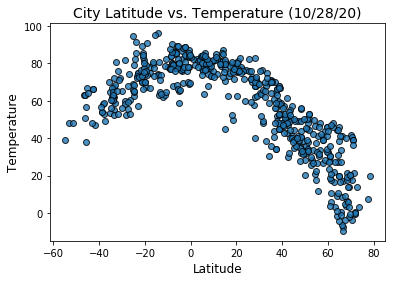

In [5]:
plt.scatter(df["Latitude"], df["Temperature"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Temperature (10/28/20)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.show()

## Latitude vs. Humidity Plot

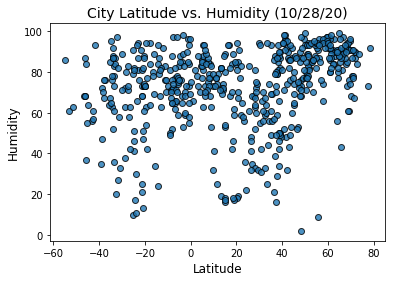

In [6]:
plt.scatter(df["Latitude"], df["Humidity"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Humidity (10/28/20)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity", fontsize=12)
plt.show()

## Latitude vs. Cloudiness Plot

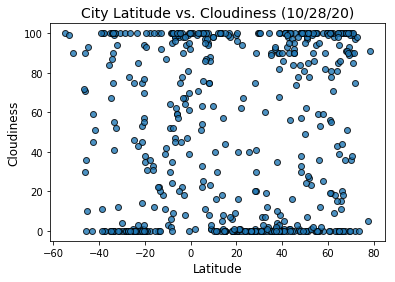

In [7]:
plt.scatter(df["Latitude"], df["Cloudiness"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Cloudiness (10/28/20)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.show()

## Latitude vs. Wind Speed Plot

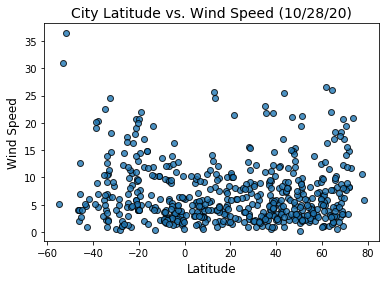

In [8]:
plt.scatter(df["Latitude"], df["Wind Speed"], edgecolor="black", linewidths=1, alpha=0.8)
plt.title("City Latitude vs. Wind Speed (10/28/20)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.show()

## Linear Regression

In [9]:
northern_data = weather_data[weather_data["Latitude"]>=0]
southern_data = weather_data[weather_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

nht_rvalue=-0.89


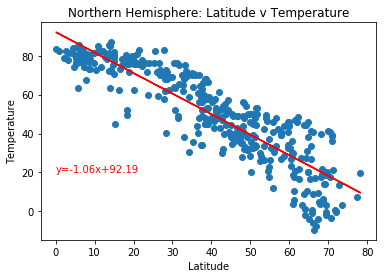

In [21]:
nht_x_value = northern_data["Latitude"]
nht_y_value = northern_data["Temperature"]
(nht_slope, nht_intercept, nht_rvalue, nht_pvalue, nht_stderr)=linregress(nht_x_value,nht_y_value)
nht_regress_value = nht_x_value * nht_slope + nht_intercept
nht_line_eq = "y=" + str(round(nht_slope,2)) + "x+" + str(round(nht_intercept,2))
plt.scatter(nht_x_value,nht_y_value)
plt.plot(nht_x_value, nht_regress_value, "r-")
plt.annotate(nht_line_eq,(0,20), color="red")
plt.title("Northern Hemisphere: Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"nht_rvalue={round(nht_rvalue,2)}")
plt.savefig("Northern_Hemisphere_Temp_v_Lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

sht_rvalue=0.69


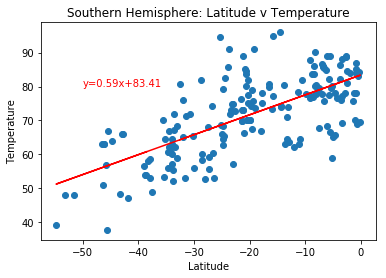

In [13]:
sht_x_value = southern_data["Latitude"]
sht_y_value = southern_data["Temperature"]
(sht_slope, sht_intercept, sht_rvalue, sht_pvalue, sht_stderr)=linregress(sht_x_value,sht_y_value)
sht_regress_value = sht_x_value * sht_slope + sht_intercept
sht_line_eq = "y=" + str(round(sht_slope,2)) + "x+" + str(round(sht_intercept,2))
plt.scatter(sht_x_value,sht_y_value)
plt.plot(sht_x_value, sht_regress_value, "r-")
plt.annotate(sht_line_eq,(-50,80), color="red")
plt.title("Southern Hemisphere: Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"sht_rvalue={round(sht_rvalue,2)}")
plt.savefig("Southern_Hemisphere_Temp_v_Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

nhh_rvalue=0.34


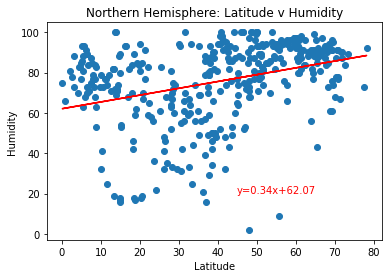

In [20]:
nhh_x_value = northern_data["Latitude"]
nhh_y_value = northern_data["Humidity"]
(nhh_slope, nhh_intercept, nhh_rvalue, nhh_pvalue, nhh_stderr)=linregress(nhh_x_value,nhh_y_value)
nhh_regress_value = nhh_x_value * nhh_slope + nhh_intercept
nhh_line_eq = "y=" + str(round(nhh_slope,2)) + "x+" + str(round(nhh_intercept,2))
plt.scatter(nhh_x_value,nhh_y_value)
plt.plot(nhh_x_value, nhh_regress_value, "r-")
plt.annotate(nhh_line_eq,(45,20), color="red")
plt.title("Northern Hemisphere: Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"nhh_rvalue={round(nhh_rvalue,2)}")
plt.savefig("Northern_Hemisphere_Hum_v_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

shh_rvalue=0.34


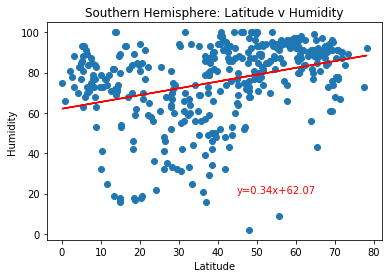

In [19]:
shh_x_value = northern_data["Latitude"]
shh_y_value = northern_data["Humidity"]
(shh_slope, shh_intercept, shh_rvalue, shh_pvalue, shh_stderr)=linregress(shh_x_value,shh_y_value)
shh_regress_value = shh_x_value * shh_slope + shh_intercept
shh_line_eq = "y=" + str(round(shh_slope,2)) + "x+" + str(round(shh_intercept,2))
plt.scatter(shh_x_value,shh_y_value)
plt.plot(shh_x_value, shh_regress_value, "r-")
plt.annotate(shh_line_eq,(45,20), color="red")
plt.title("Southern Hemisphere: Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"shh_rvalue={round(shh_rvalue,2)}")
plt.savefig("Southern_Hemisphere_Hum_v_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression